# LGM Data science internship Task 2

##Stock Market Prediction and Forecasting using Stacked LSTM

In [291]:
dataset_link = "https://raw.githubusercontent.com/ShalakaPawar/LGMVIP-DataScience/master/Beginner%20Level%20Tasks/Stock%20Market%20Prediction/NSE-TATAGLOBAL.csv"

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns
import math
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [293]:
df = pd.read_csv(dataset_link)

In [294]:
df.set_index("Date")

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [295]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [296]:
df.shape

(2035, 8)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [298]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [299]:
df = df.sort_values("Date")

### Data Visualisation

In [300]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


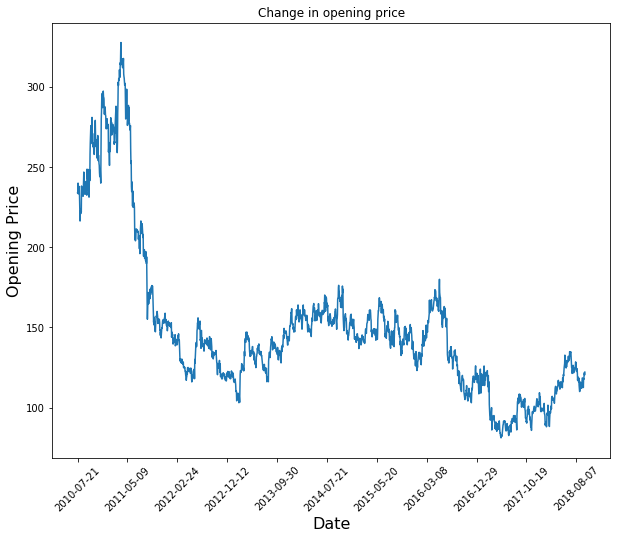

In [301]:
plt.figure(figsize=(10, 8))
plt.plot(df["Open"])
plt.xticks(range(0,df.shape[0],200),df['Date'].loc[::200], rotation=45)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Opening Price',fontsize=16)
plt.title("Change in opening price")
plt.show()

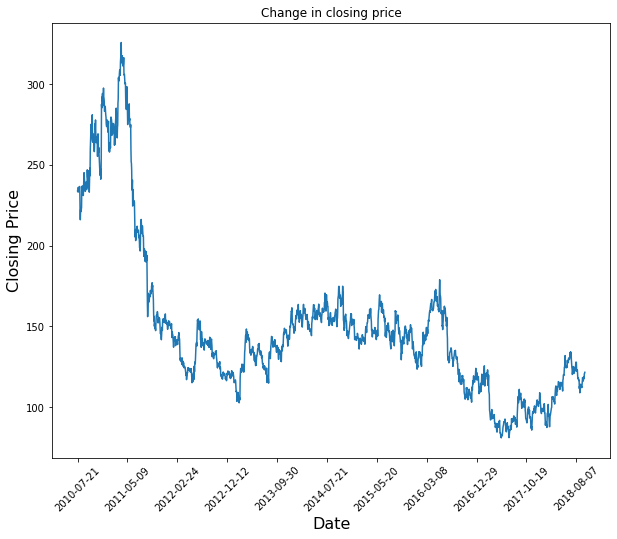

In [302]:
plt.figure(figsize=(10, 8))
plt.plot(df["Close"])
plt.xticks(range(0,df.shape[0],200),df['Date'].loc[::200], rotation=45)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Closing Price',fontsize=16)
plt.title("Change in closing price")
plt.show()

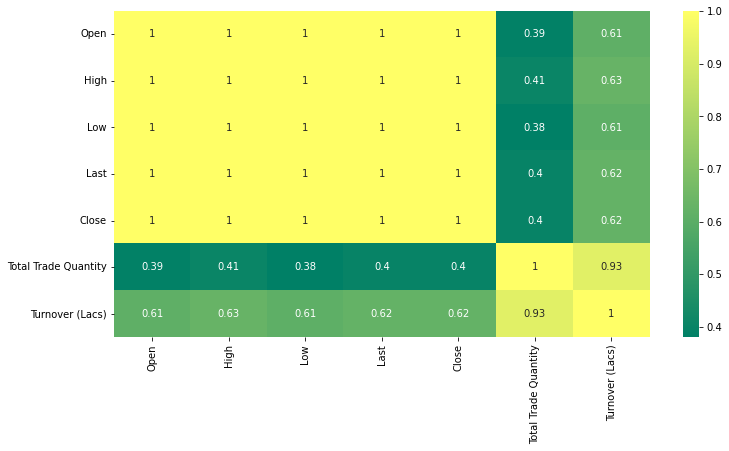

In [303]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='summer')

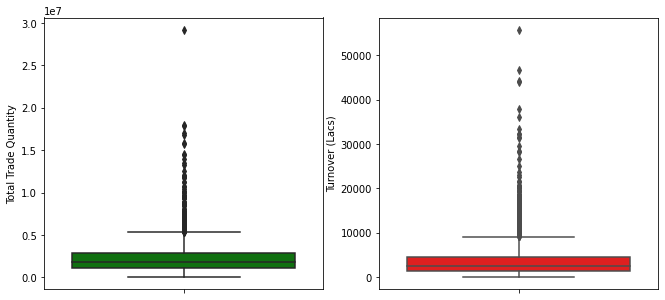

In [304]:
plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,y='Total Trade Quantity',color='green')
plt.subplot(1,2,2)
sns.boxplot(data=df,y='Turnover (Lacs)',color='red')

In [305]:
data = df.filter(["Close"])
training_size = math.ceil(data.shape[0]*0.7)
training_size

1425

In [306]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(data)

In [307]:
scaled_df

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [308]:
training_dataset = scaled_df[:training_size, :]
test_dataset = scaled_df[training_size:, :]

In [309]:
training_dataset.shape

(1425, 1)

In [310]:
test_dataset.shape

(610, 1)

In [311]:
item_set = 60

In [312]:
X_train = []
y_train = []
for i in range(item_set, len(training_dataset)):
  X_train.append(training_dataset[i-item_set:i, 0])
  y_train.append(training_dataset[i, 0])

In [313]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1365, 60, 1)

Building the LSTM Model

In [314]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [315]:
model.compile(optimizer="adam", loss="mean_squared_error")

In [316]:
model.fit(X_train, y_train, batch_size=1, epochs=1)

1365/1365 [==============================] - 40s 27ms/step - loss: 7.8718e-04


In [317]:
X_test = []
# get the unscaled values
y_test = np.array(data.iloc[training_size+item_set:, 0])
for i in range(item_set, len(test_dataset)):
  X_test.append(test_dataset[i-item_set:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [318]:
predictions = model.predict(X_test)

# unscaling the values
predictions = scaler.inverse_transform(predictions)

In [319]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.1181368935325

Plot the output

In [320]:
train = pd.DataFrame(data[:training_size+item_set])
valid = data[training_size+item_set:]
valid["Predictions"] = predictions
valid = valid.loc[::-1]
valid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Predictions
0,233.75,231.873810
1,233.25,232.654221
2,234.25,233.071121
3,236.10,232.985489
4,233.30,233.154816
...,...,...
545,130.05,133.974609
546,129.95,134.632812
547,132.60,134.817886
548,132.60,135.126083


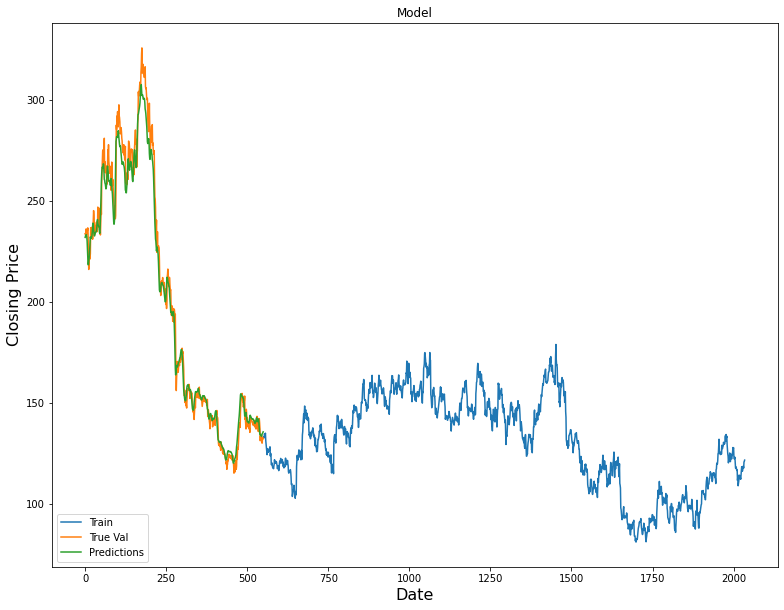

In [321]:

plt.figure(figsize=(13,10))
plt.title("Model")
plt.xlabel("Date", fontsize=16)
plt.ylabel("Closing Price", fontsize=16)
plt.plot(train[:])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "True Val", "Predictions"], loc="lower left")
plt.show()